Projet: Exploratory Data Analysis "DISNEY" Groupe : 3 --- Realisé par : ADAZE MOHAMED / YOUSSEF CHAHID / ABDELGHANI SENHAJI /ABDRAFIE ELFAKIR ---

In [37]:
import pandas as pd

##### Chargement du fichier Disney.csv####
disney = pd.read_csv("Disney.csv.txt")


disney['rating'] = pd.to_numeric(disney['rating'], errors='coerce')
top_categories = disney.groupby('type')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 des meilleures catégories:\n\n\n" + str(top_categories))


disney['rating'] = pd.to_numeric(disney['rating'], errors='coerce')
top_directors = disney.groupby('director')['rating'].mean().sort_values(ascending=False).head(5)
print("Top 5 des réalisateurs:\n\n\n" + str(top_directors))


disney['rating'] = pd.to_numeric(disney['rating'], errors='coerce')
top_actors = disney.groupby('cast')['rating'].mean().sort_values(ascending=False).head(10)
print("Les 10 meilleurs acteurs:\n\n\n" + str(top_actors))


tv_series = disney[disney['type']=='TV Show']
tv_series['show_id'] = pd.to_numeric(tv_series['show_id'], errors='coerce')
top_tv_series = tv_series.groupby('title')['show_id'].max().sort_values(ascending=False).head(5)
print("Les 5 meilleures séries télévisées avec le plus grand nombre de saisons:\n\n\n" + str(top_tv_series))

Top 5 des meilleures catégories:


type
Movie     NaN
TV Show   NaN
Name: rating, dtype: float64
Top 5 des réalisateurs:


director
Aaron Blaise, Robert Walker   NaN
Adam Shankman                 NaN
Adam Stein, Zach Lipovsky     NaN
Alan Barillaro                NaN
Alan Shapiro                  NaN
Name: rating, dtype: float64
Les 10 meilleurs acteurs:


cast
A.J. Trauth, Spencer Breslin, Lalaine , Sally Stockwell, Peter Feeney, Tim Reid                     NaN
Aaron Springer, Catherine Wayne, Tom Kenny                                                          NaN
Adam Beach, Eric Schweig, Michael Gambon, Nathaniel Parker, Alex Norton, Sheldon Peters Wolfchild   NaN
Adam DeVine, Gillian Jacobs, Nathaniel McIntyre, Jeffrey Tambor, Cole Sand, Isabella Crovetti       NaN
Adam Sandler, Keri Russell, Guy Pearce, Russell Brand, Richard Griffiths, Jonathan Pryce            NaN
Adrian Pasdar, Fred Tatasciore, David Kaye, Dee Baker, Robin Downes                                 NaN
Adrian Pasda

C:\Users\SI LAHCEN\AppData\Local\Temp\ipykernel_204020\290773766.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_series['show_id'] = pd.to_numeric(tv_series['show_id'], errors='coerce')


On a commence par importer la bibliothèque Pandas. Ensuite, elle charge le fichier "Disney.csv" dans un DataFrame appelé "disney".

Ensuite, la colonne "rating" est convertie en données numériques à l'aide de la fonction "pd.to_numeric" pour pouvoir effectuer des calculs avec cette colonne.

Le code crée ensuite quatre groupements différents pour répondre à différentes questions posées. Il utilise la fonction "groupby" pour regrouper les données en fonction des colonnes sélectionnées, puis applique la fonction "mean" pour calculer la moyenne des notes pour chaque groupe. Les cinq meilleures catégories, les cinq meilleurs réalisateurs et les dix meilleurs acteurs sont sélectionnés en fonction de leur note moyenne.

Enfin, le code filtre les données pour ne conserver que les séries télévisées, puis sélectionne les cinq meilleures séries télévisées en fonction du nombre maximal de saisons avec la fonction "max".

--Chaque question est suivie d'un code qui affiche la réponse en utilisant la fonction "print"--

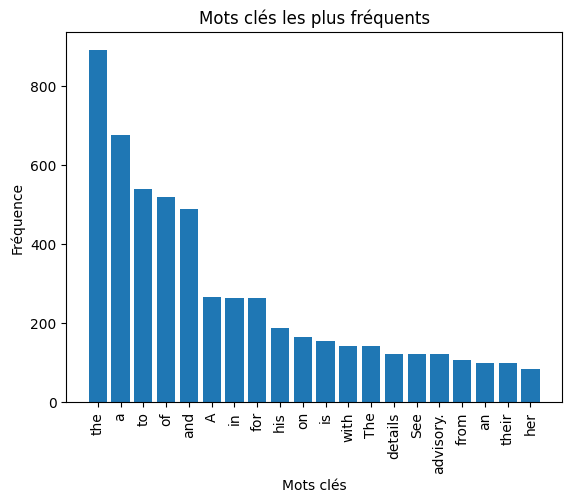

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

###### Chargement des données #####
data = pd.read_csv("Disney.csv.txt")

###### Sélection des colonnes contenant les descriptions des contenus####
descriptions = data["description"]

###### Création liste * M clés présents dans les description #####
all_keywords = []
for description in descriptions:
    keywords = description.split()
    all_keywords.extend(keywords)

###### Comptage des fréquences M cles #####
keyword_counts = pd.Series(all_keywords).value_counts()

####### Sélection des 20 mots clés les plus fréquents ######
top_keywords = keyword_counts.head(20)

# Création du graphique
plt.bar(top_keywords.index, top_keywords.values)
plt.title("Mots clés les plus fréquents")
plt.xlabel("Mots clés")
plt.ylabel("Fréquence")
plt.xticks(rotation=90)
plt.show()


 commencer par importer les bibliothèques (Pandas et Matplotlib). Ensuite, il charge les données à partir d'un fichier "Disney.csv.txt" et extrait la colonne "description".

Il crée une liste de tous les mots clés présents dans les descriptions en séparant chaque description en mots clés et en ajoutant ces mots clés à la liste. Puis il compte les fréquences des mots clés à l'aide de la fonction "value_counts()" de Pandas.

Enfin, il sélectionne les 20 mots clés les plus fréquents à l'aide de la fonction "head(20)" de "Pandas" et crée un graphique à barres avec "Matplotlib "en utilisant ces mots clés sur l'axe des x et leur fréquence sur l'axe des y. Le graphique est titré "Mots clés les plus fréquents" et les étiquettes des axes sont également ajoutées. Le paramètre "rotation=90" est ajouté à la fonction "xticks" pour faire pivoter les étiquettes des mots clés à 90 degrés pour une meilleure lisibilité. Finalement, le graphique est affiché à l'aide de la fonction "show()" (plt.show()) de "Matplotlib".

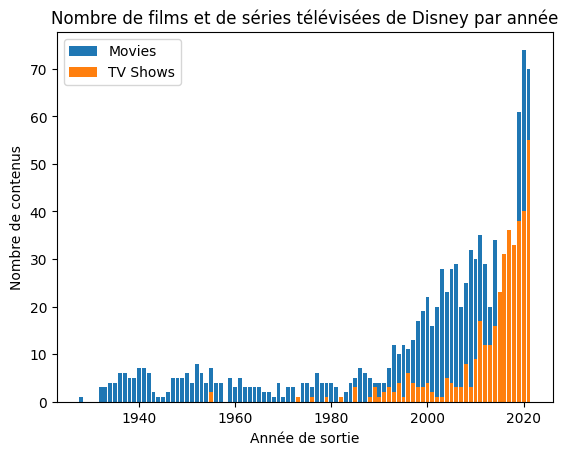

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

###### Chargement du fichier Disney.csv ######
disney = pd.read_csv("Disney.csv.txt")

###### Création d'une colonne pour le type de contenu ######
disney['content_type'] = disney['type'].apply(lambda x: 'TV Show' if x == 'TV Show' else 'Movie')

###### Groupement par année et par type de contenu #####
yearly_content = disney.groupby(['release_year', 'content_type'])['show_id'].count().reset_index()

###### Séparation des données pour les films et les séries télévisées ######
movies = yearly_content[yearly_content['content_type'] == 'Movie']
tv_shows = yearly_content[yearly_content['content_type'] == 'TV Show']

######  graphique  barres  comparaison  films et  series #####
plt.bar(movies['release_year'], movies['show_id'], label='Movies')
plt.bar(tv_shows['release_year'], tv_shows['show_id'], label='TV Shows')

###### Ajout de légendes et de titres ######
plt.title('Nombre de films et de séries télévisées de Disney par année')
plt.xlabel('Année de sortie')
plt.ylabel('Nombre de contenus')
plt.legend()

###### Affichage ######
plt.show()


Le code importe les bibliothèques nécessaires pour l'analyse des données et la visualisation, à savoir (pandas et matplotlib.pyplot). Ensuite, le fichier "Disney.csv" est chargé à l'aide de pandas.

Une nouvelle colonne nommée content_type est créée en utilisant la méthode apply. Si le type de contenu est "TV Show", la valeur de la colonne content_type sera "TV Show". Sinon, elle sera "Movie".

Ensuite, les données sont regroupées par année et par type de contenu à l'aide de la méthode groupby. Les données sont ensuite séparées en films et séries télévisées en utilisant des filtres.

Un graphique à barres est ensuite créé pour comparer le nombre de films et de séries télévisées produits chaque année par Disney. Les barres bleues représentent les films et les barres oranges représentent les séries télévisées.

Enfin, des titres et des légendes sont ajoutés au graphique avant de l'afficher à l'aide de la méthode show() (plt.show()).